# <font color='green'><b/><center>K-Means Clustering Algorithm</center></font>

## <b/> Importing Libraries

In [7]:
# Import necessary libraries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical computations
import matplotlib.pyplot as plt # For plotting graphs

from sklearn.cluster import KMeans # For KMeans clustering algorithm

## <b/> Load the Dataset

In [3]:
# Read the CSV file 'Mall_Customers.csv' into a pandas DataFrame
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## <b/> Make another dataframe of column 3 & 4

In [4]:
# Extract columns 3 and 4 from the DataFrame 'data'
# iloc[:, [3,4]] selects all rows and columns 3 and 4 (0-indexed)
df = data.iloc[:, [3, 4]]

# Display the first few rows of the new DataFrame 'df'
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
# Check shape of dataframe
df.shape

(200, 2)

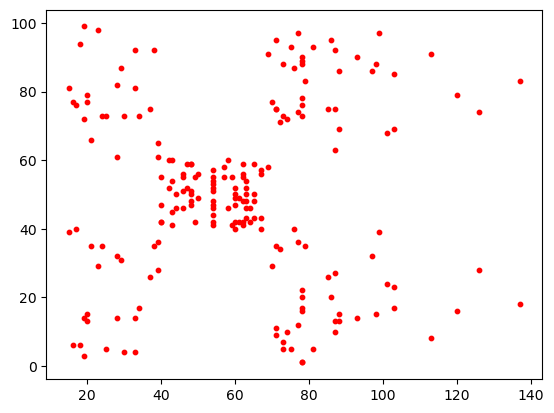

In [6]:
# Create a scatter plot for df
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='red', s=10)

## <b/> KMeans Clustering using Elbow Method

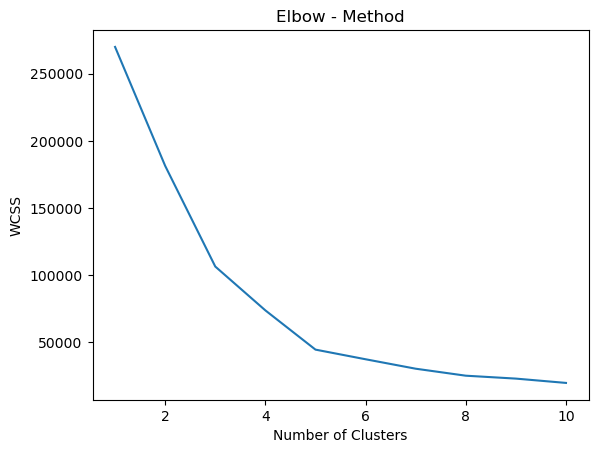

In [8]:
# Initialize an empty list to store the WCSS values
wcss = []

# Iterate over a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Create a KMeans object with 'i' clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    
    # Fit the KMeans model to the data
    kmeans.fit(df)
    
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the corresponding WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## <b/> KMeans Clustering with Specified Clusters

In [9]:
# Create a KMeans object with 5 clusters using k-means++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

# Fit the KMeans model to the data and predict cluster labels for each data point
labels = kmeans.fit_predict(df)

In [10]:
# Find the unique cluster labels
unique_labels = np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

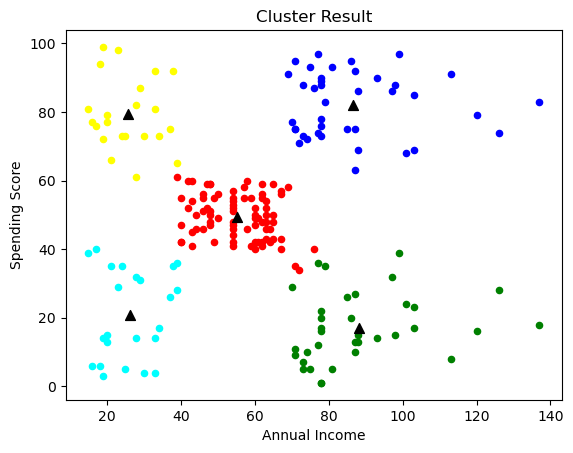

In [11]:
# Scatter plot for points in cluster 0
plt.scatter(df.iloc[labels==0, 0], df.iloc[labels==0, 1], s=20, c='red')

# Scatter plot for points in cluster 1
plt.scatter(df.iloc[labels==1, 0], df.iloc[labels==1, 1], s=20, c='green')

# Scatter plot for points in cluster 2
plt.scatter(df.iloc[labels==2, 0], df.iloc[labels==2, 1], s=20, c='blue')

# Scatter plot for points in cluster 3
plt.scatter(df.iloc[labels==3, 0], df.iloc[labels==3, 1], s=20, c='yellow')

# Scatter plot for points in cluster 4
plt.scatter(df.iloc[labels==4, 0], df.iloc[labels==4, 1], s=20, c='cyan')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='black', marker='^')

# Set plot title and labels
plt.title('Cluster Result')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Show the plot
plt.show()

--------